📌 in this task, we will build multi layer perceptron (mlp) model to predict a handwritten digit number, then we will fine-tune the model to maximize its accuracy

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

#Loading The Dataset

📌we will use the mnist dataset in keras datasets

📌mnist dataset is a large collection of handwritten digits (0 to 9)

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

#

#Giving The Data a New Scale Between 0 and 1

📌this is a form of normalization, by normalizing the values:

1- we improve model performance

2- we give a common range for all features


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

9


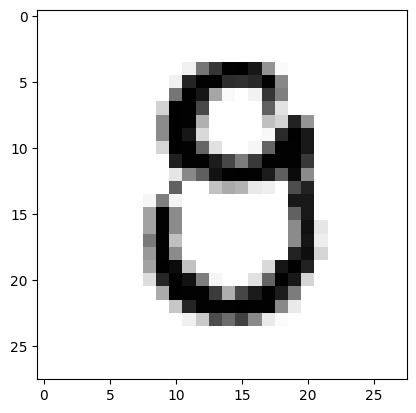

In [ ]:
index = 80

plt.imshow(X_train[index], cmap=plt.cm.binary)
print(y_train[index])

#Flattening the dataset so it is in the shape that the model expects

In [ ]:
X_train_flat = X_train.reshape(len(X_train), (28 * 28))
X_test_flat = X_test.reshape(len(X_test), (28 * 28))

In [ ]:
X_train_flat.shape

(60000, 784)

In [ ]:
X_test_flat.shape

(10000, 784)

📌notice that after flattening the data, the shape of each picture of a digit will be a 1D array of 784 pixel values instead of 28*28

#Building The Model (Multi Layer Perceptron)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7892 - loss: 0.9120
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9618 - loss: 0.1420
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9745 - loss: 0.0907
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9836 - loss: 0.0580
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9876 - loss: 0.0440


In [ ]:
model.evaluate(X_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0975


[0.08384686708450317, 0.9753999710083008]

📌the model achieved a really good accuracy, with 98.7% on the training data and 97.5% on the testing data, lets see if we can increase this accuracy using hyperparameter tuning

#Hyperparameters Fine-Tuning

📌we will use keras tuner for tuning hyperparameters

In [ ]:
!pip install keras-tuner==1.4.7

In [ ]:
import keras_tuner as kt

def model_builder(hp):
  model =  keras.Sequential([
    keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                        input_shape=(784,), activation='relu'),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

tuner = kt.RandomSearch(model_builder,
                        objective='val_accuracy',
                        max_trials=5)

tuner.search(X_train_flat, y_train, epochs=5, validation_data=(X_test_flat, y_test))
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
model = tuner.hypermodel.build(best_hps)
model.fit(X_train_flat, y_train, epochs=5)

Trial 5 Complete [00h 01m 37s]
val_accuracy: 0.9796000123023987

Best val_accuracy So Far: 0.98089998960495
Total elapsed time: 00h 06m 31s
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8184 - loss: 0.8428
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9684 - loss: 0.1181
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9818 - loss: 0.0687
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9880 - loss: 0.0434
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9915 - loss: 0.0297


📌as we can see, the validation accuracy for the model increased after hyperparameter tuning, to reach 98%